In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_file = "opioid/multiple_cause_of_death_1999-2014.csv"
df = pd.read_csv(data_file)

In [3]:
df.head()

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39.0,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46.0,4447100,1.0,0.8,1.4,126
2,Alabama,2001,67.0,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75.0,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54.0,4503491,1.2,0.9,1.6,149


In [4]:
df.describe()

,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
count,816.000000,803.000000,8.160000e+02,772.000000,803.000000,803.000000,816.000000
mean,2006.500000,360.459527,5.871569e+06,6.866839,5.786675,7.646700,174.625000
std,4.612599,384.235773,6.561914e+06,4.210833,3.922066,4.589598,32.807063
min,1999.000000,10.000000,4.917800e+05,0.700000,0.300000,0.800000,116.000000
25%,2002.750000,81.000000,1.580634e+06,4.000000,3.050000,4.400000,147.250000
50%,2006.500000,228.000000,4.112482e+06,5.900000,4.900000,6.500000,179.000000
75%,2010.250000,513.500000,6.589866e+06,9.000000,7.800000,9.950000,203.250000
max,2014.000000,2175.000000,3.880250e+07,32.100000,29.500000,34.700000,219.000000


In [5]:
df.dtypes

State                                                               object
Year                                                                 int64
Deaths                                                             float64
Population                                                           int64
Crude Rate                                                         float64
Crude Rate Lower 95% Confidence Interval                           float64
Crude Rate Upper 95% Confidence Interval                           float64
Prescriptions Dispensed by US Retailers in that year (millions)      int64
dtype: object

In [6]:
df = df[["Year", "State", "Deaths", "Population", "Prescriptions Dispensed by US Retailers in that year (millions)"]]

In [7]:
df

,Year,State,Deaths,Population,Prescriptions Dispensed by US Retailers in that year (millions)
0,1999,Alabama,39.0,4430141,116
1,2000,Alabama,46.0,4447100,126
2,2001,Alabama,67.0,4467634,138
3,2002,Alabama,75.0,4480089,142
4,2003,Alabama,54.0,4503491,149
5,2004,Alabama,92.0,4530729,155
6,2005,Alabama,83.0,4569805,163
7,2006,Alabama,134.0,4628981,174
8,2007,Alabama,172.0,4672840,184
9,2008,Alabama,195.0,4718206,196


In [14]:
df.shape

(816, 6)

## Data Cleaning

In [8]:
df["Prescriptions Dispensed by US Retailers"] = df["Prescriptions Dispensed by US Retailers in that year (millions)"].map(lambda x: x*1000000)

In [19]:
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns; seaborn.set()
rcParams['figure.figsize'] = 15, 6


opioid_df_by_year = df.groupby(df['Year'])[['Deaths', 'Population', 'Prescriptions Dispensed by US Retailers']].sum()


#plt.title("Sum of Opioid Data by Year")
#plt.plot(opioid_df_by_year);

In [10]:
opioid_df_by_year

,Deaths,Population,Prescriptions Dispensed by US Retailers
Year,,,
1999,8627.0,279040168,5916000000
2000,9036.0,281421906,6426000000
2001,10123.0,284968955,7038000000
2002,12656.0,287625193,7242000000
2003,13699.0,290107933,7599000000
2004,14584.0,292805298,7905000000
2005,15742.0,295516599,8313000000
2006,18457.0,298379912,8874000000
2007,19286.0,301231207,9384000000


In [13]:
opioid_df_by_year.shape

(16, 3)

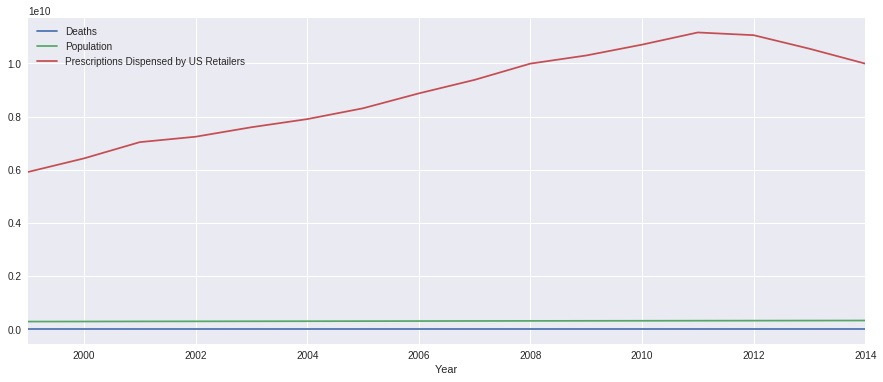

In [11]:
opioid_df_by_year.plot();

Scales differ by feature, clearly not conducive to displaying on one plot.

In [12]:
opioid_df_by_year.index

Int64Index([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='Year')

In [15]:
opioid_deaths = opioid_df_by_year["Deaths"]
population = opioid_df_by_year["Population"]
opioid_rx = opioid_df_by_year["Prescriptions Dispensed by US Retailers"]

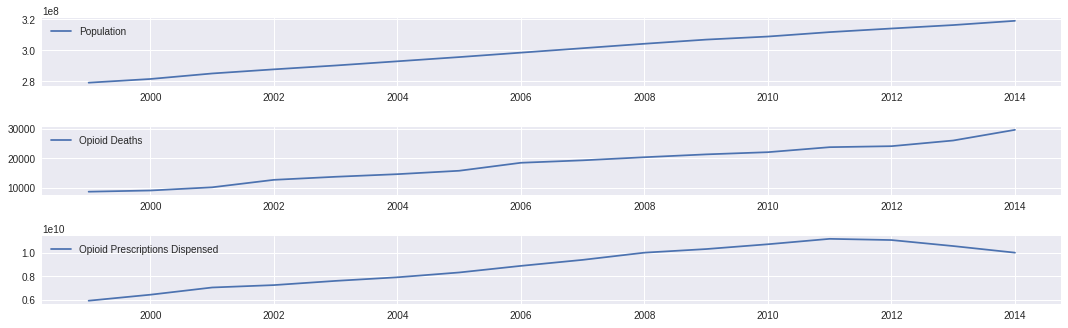

In [18]:
plt.subplot(411)
plt.plot(population, label='Population')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(opioid_deaths, label='Opioid Deaths')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(opioid_rx,label='Opioid Prescriptions Dispensed')
plt.legend(loc='best')
plt.tight_layout()

Decomposed data provides a clearer view of trend by feature.

# State Analysis

In [27]:
df_population = df[["Year", "State", "Population"]]
df_opioid_deaths = df[["Year", "State", "Deaths"]]
df_opioid_rx = df[["Year", "State", "Prescriptions Dispensed by US Retailers"]]

In [29]:
df_opioid_deaths = df_opioid_deaths.pivot("State", "Year", "Deaths")

In [30]:
df_opioid_deaths

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
State,,,,,,,,,,,,,,,,
Alabama,39.0,46.0,67.0,75.0,54.0,92.0,83.0,134.0,172.0,195.0,210.0,194.0,180.0,175.0,175.0,282.0
Alaska,28.0,27.0,17.0,NaN,14.0,11.0,19.0,29.0,16.0,94.0,94.0,71.0,72.0,81.0,69.0,79.0
Arizona,250.0,249.0,275.0,340.0,350.0,360.0,393.0,479.0,490.0,515.0,625.0,650.0,596.0,565.0,545.0,616.0
Arkansas,29.0,20.0,30.0,96.0,98.0,133.0,127.0,149.0,156.0,210.0,221.0,198.0,176.0,181.0,175.0,179.0
California,1598.0,1105.0,605.0,1583.0,1530.0,1547.0,1485.0,1602.0,1762.0,1889.0,2128.0,2059.0,2057.0,1847.0,2088.0,2159.0
Colorado,169.0,184.0,204.0,206.0,229.0,233.0,310.0,337.0,368.0,365.0,412.0,325.0,423.0,415.0,443.0,532.0
Connecticut,158.0,173.0,158.0,174.0,168.0,196.0,175.0,238.0,249.0,233.0,220.0,225.0,213.0,202.0,442.0,531.0
Delaware,32.0,36.0,40.0,54.0,46.0,38.0,33.0,42.0,52.0,68.0,93.0,116.0,115.0,86.0,115.0,125.0
District of Columbia,28.0,43.0,48.0,29.0,60.0,53.0,45.0,62.0,29.0,33.0,13.0,36.0,57.0,45.0,60.0,65.0


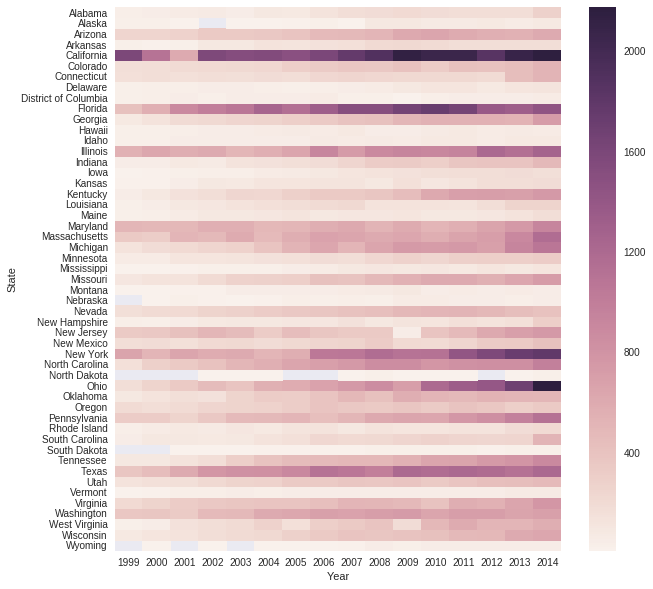

In [64]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 10
sns.heatmap(df_opioid_deaths);

States with higher population will naturally experience a higher rate of death. We need to normalize the ratio of death by population size. 

## Normalize Death data by State Population

In [71]:
df_state_death_ratio = df[["State", "Year"]]

def ratio_calc(x):
    return x[1]/x[0]

df_state_death_ratio["Death Ratio"] = df[["Population", "Deaths"]].apply(ratio_calc, axis=1)

/home/faust/Projects/data-exploration/env/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
df_state_death_ratio

,State,Year,Death Ratio
0,Alabama,1999,0.000009
1,Alabama,2000,0.000010
2,Alabama,2001,0.000015
3,Alabama,2002,0.000017
4,Alabama,2003,0.000012
5,Alabama,2004,0.000020
6,Alabama,2005,0.000018
7,Alabama,2006,0.000029
8,Alabama,2007,0.000037
9,Alabama,2008,0.000041


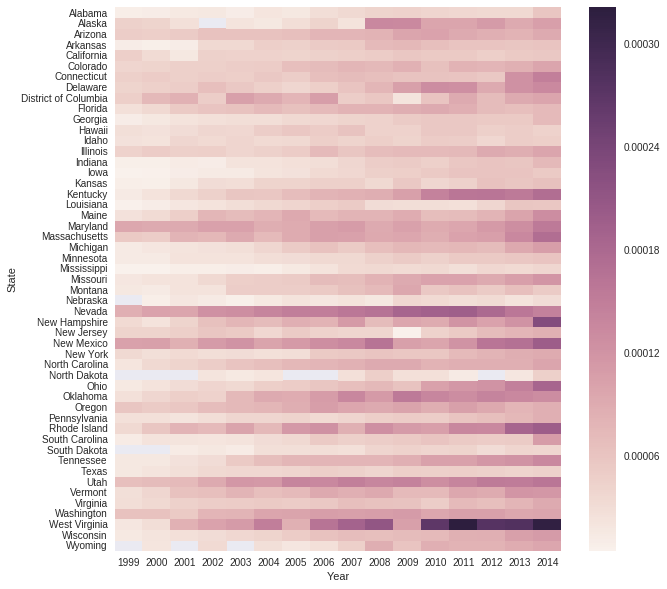

In [73]:
df_state_death_ratio = df_state_death_ratio.pivot("State", "Year", "Death Ratio")

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 10
sns.heatmap(df_state_death_ratio);